In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r"C:\Users\e0280497\Documents\Python\Instacart Basket Analysis"
ords_prods_cust= pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data','ords_prods_cust.pkl'))

### 02. Consider any security implications that might exist for this new data

To address the security implications of personally identifiable information (PII) in the database, the columns 'first_name' and 'last_name' should be dropped from the database. These columns contain information that can directly identify an individual, and their removal can help to protect the confidentiality and privacy of this information.

In [3]:
# Drop the columns that contain personal information
opc_nonames=ords_prods_cust.drop(columns=['first_name', 'last_name'])

In [4]:
# Check the results
opc_nonames.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,median_days,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both


### 03. Create a regional segmentation of the data by creating a “Region” column based on the “State”

In [5]:
# Create flags to assign "region" labels to users based on 'states'
opc_nonames.loc[opc_nonames['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

In [6]:
opc_nonames.loc[opc_nonames['state'].isin(['Wisconsin' , 'Michigan' , 'Illinois' , 'Indiana' , 'Ohio' , 'North Dakota' , 'South Dakota' , 'Nebraska' , 'Kansas' , 'Minnesota' , 'Iowa' , 'Missouri']
) , 'region'] = 'Midwest' 

In [7]:
opc_nonames.loc[opc_nonames['state'].isin(['Delaware' , 'Maryland' , 'District of Columbia' , 'Virginia' , 'West Virginia' , 'North Carolina' , 'South Carolina' , 'Georgia' , 'Florida' , 'Kentucky' , 'Tennessee' , 'Mississippi' , 'Alabama' , 'Oklahoma' , 'Texas' , 'Arkansas' , 'Louisiana']
) , 'region'] = 'South' 

In [8]:
opc_nonames.loc[opc_nonames['state'].isin(['Idaho' , 'Montana' , 'Wyoming' , 'Nevada' , 'Utah' , 'Colorado' , 'Arizona' , 'New Mexico' , 'Alaska' , 'Washington' , 'Oregon' , 'California' , 'Hawaii']
) , 'region'] = 'West' 

In [9]:
# Check flag counts
opc_nonames['region'].value_counts()

South        10801195
West          8300141
Midwest       7603550
Northeast     5728144
Name: region, dtype: int64

In [10]:
# Create crosstab between 'region' and 'spending_flag'
spendingvregion = pd.crosstab(opc_nonames['region'], opc_nonames['spending_flag'], dropna = False)

In [11]:
# Print crosstab results
spendingvregion

spending_flag,High Spender,Low Spender
region,,
Midwest,29342,7574208
Northeast,18735,5709409
South,40975,10760220
West,31632,8268509


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

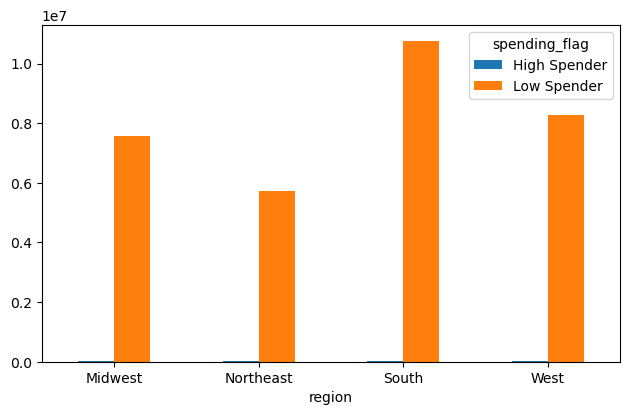

In [12]:
# Create a bar chart from the crosstab
spendingvregion_bar = spendingvregion.plot.bar()
plt.tight_layout()
plt.xticks(rotation=0) 

The proportion of High-Spender Customers is insignificant compared to Low-Spender Customers

In [13]:
# Export the bar chart
spendingvregion_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending v Region bar chart.png'))


### 04. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [14]:
# Create an activity column  based on 'max order' value
opc_nonames.loc[opc_nonames['max_order']>= 5, 'customer_activity'] = 'High-activity customer'

In [15]:
opc_nonames.loc[opc_nonames['max_order']< 5, 'customer_activity'] = 'Low-activity customer'

In [16]:
#Check results
opc_nonames['customer_activity'].value_counts()

High-activity customer    30991542
Low-activity customer      1441488
Name: customer_activity, dtype: int64

In [17]:
# Create a subset for Low-activity customers 
low_act_cust=opc_nonames[opc_nonames['customer_activity']=='Low-activity customer']

In [18]:
# Check that the active customer data corresponds to the values from the "customer_activity" column
low_act_cust.shape

(1441488, 33)

In [19]:
# Exporting the low-activity customers sample
low_act_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data','Low_activity_Customers.pkl'))

In [20]:
# Drop the Low-activity customers' infomation from the dataset to foucs on the more active customers
active_cust=opc_nonames.drop(low_act_cust.index)

In [21]:
# Check that the active customer data corresponds to the values from the "customer_activity" column
active_cust.shape

(30991542, 33)

### 05. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

In [22]:
# information about the variables age, income, and number of dependants to segmentate appropiately
active_cust[['age', 'income', 'number_of_dependants']].describe()

,age,income,number_of_dependants
count,3.099154e+07,3.099154e+07,3.099154e+07
mean,4.946796e+01,9.967335e+04,1.501803e+00
std,1.848522e+01,4.313946e+04,1.118901e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.728900e+04,1.000000e+00
50%,4.900000e+01,9.676500e+04,2.000000e+00
75%,6.500000e+01,1.281010e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


#### Age profiling

In [23]:
# Create a 'life_cycle' column based on the customer's age
active_cust.loc[(active_cust['age'] >= 18) & (active_cust['age']<35), 'life_cycle']  = 'Young Adult'

In [24]:
active_cust.loc[(active_cust['age'] >= 35) & (active_cust['age']<=50), 'life_cycle'] = 'Middle-aged Adult'

In [25]:
active_cust.loc[(active_cust['age']>50) & (active_cust['age']<=65), 'life_cycle'] = 'Older adult'

In [26]:
active_cust.loc[active_cust['age']>65, 'life_cycle'] = 'Senior'

In [27]:
# Check the value counts for each segment of customers
active_cust['life_cycle'].value_counts()

Young Adult          8249495
Middle-aged Adult    7781225
Senior               7737379
Older adult          7223443
Name: life_cycle, dtype: int64

#### Income profiling

According to the distribution of the income data, three income groups have been defined as follows: Low-income group:  25k to 70k, Middle-income group: 70k to 150k, and High-income group: 150k and above

In [28]:
# Create a 'income_flag' column based on the customer's income
active_cust.loc[active_cust['income']<70000, 'income_flag'] = 'Low-income'

In [29]:
active_cust.loc[(active_cust['income']>=70000) & (active_cust['income']<=150000), 'income_flag'] = 'Middle-income'

In [30]:
active_cust.loc[active_cust['income']>150000, 'income_flag'] = 'High-income'

In [31]:
active_cust['income_flag'].value_counts()

Middle-income    18565282
Low-income        8528476
High-income       3897784
Name: income_flag, dtype: int64

#### Department profiling

In [32]:
# Import department data
departments= pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data','departments_wrangled.csv'), index_col=False)

In [33]:
# Rename Unnamed:0 
departments.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [34]:
# Merge the dataframe with the department names
instacart_all=active_cust.merge(departments, on = 'department_id')

In [35]:
# Check resulting columns
instacart_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependants,marital_status,income,_merge,region,customer_activity,life_cycle,income_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,both,South,High-activity customer,Young Adult,Low-income,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,High-activity customer,Young Adult,Low-income,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,High-activity customer,Young Adult,Low-income,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,High-activity customer,Young Adult,Low-income,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,High-activity customer,Young Adult,Low-income,beverages


#### Number of dependants

In [36]:
 # Check the values in the 'marital_status' column
instacart_all['marital_status'].value_counts()

married                             21762270
single                               5099036
divorced/widowed                     2647661
living with parents and siblings     1482575
Name: marital_status, dtype: int64

In [37]:
 # Check the values in the 'number_of_dependants' column
instacart_all['number_of_dependants'].value_counts()

3    7779192
0    7746697
2    7739960
1    7725693
Name: number_of_dependants, dtype: int64

In [38]:
 # Check the values in the 'number_of_dependants' column
instacart_all['life_cycle'].value_counts()

Young Adult          8249495
Middle-aged Adult    7781225
Senior               7737379
Older adult          7223443
Name: life_cycle, dtype: int64

#### Customer profiling according to marital status and number of dependants

In [39]:
# Create a 'family_status' flag for each customer 
instacart_all.loc[(instacart_all['marital_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (instacart_all['life_cycle'].isin(['Young Adult'])) & (instacart_all['number_of_dependants']==0), 'family_status'] = 'Single Young Adult with NO kids'
instacart_all.loc[(instacart_all['marital_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (instacart_all['life_cycle'].isin(['Young Adult'])) & (instacart_all['number_of_dependants']>=1), 'family_status'] = 'Single Young Adult with kids'

instacart_all.loc[(instacart_all['marital_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (instacart_all['life_cycle'].isin(['Middle-aged Adult'])) & (instacart_all['number_of_dependants']==0), 'family_status'] = 'Single Middle-aged Adult with NO kids'
instacart_all.loc[(instacart_all['marital_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (instacart_all['life_cycle'].isin(['Middle-aged Adult'])) & (instacart_all['number_of_dependants']>=1), 'family_status'] = 'Single Middle-aged Adult with kids'

instacart_all.loc[(instacart_all['marital_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (instacart_all['life_cycle'].isin(['Older adult'])) & (instacart_all['number_of_dependants']==0), 'family_status'] = 'Single Older adult with NO kids'
instacart_all.loc[(instacart_all['marital_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (instacart_all['life_cycle'].isin(['Older adult'])) & (instacart_all['number_of_dependants']>=1), 'family_status'] = 'Single Older adult with kids'

instacart_all.loc[(instacart_all['marital_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (instacart_all['life_cycle'].isin(['Senior'])) & (instacart_all['number_of_dependants']==0), 'family_status'] = 'Single Senior with NO kids'
instacart_all.loc[(instacart_all['marital_status'].isin(['single', 'divorced/widowed','living with parents and siblings'])) & (instacart_all['life_cycle'].isin(['Senior'])) & (instacart_all['number_of_dependants']>=1), 'family_status'] = 'Single Senior with kids'

instacart_all.loc[(instacart_all['marital_status'].isin(['married'])) & (instacart_all['life_cycle'].isin(['Young Adult'])) & (instacart_all['number_of_dependants']==0), 'family_status'] = 'Married Young Adult with NO kids'
instacart_all.loc[(instacart_all['marital_status'].isin(['married'])) & (instacart_all['life_cycle'].isin(['Young Adult'])) & (instacart_all['number_of_dependants']>=1), 'family_status'] = 'Married Young Adult with kids'

instacart_all.loc[(instacart_all['marital_status'].isin(['married'])) & (instacart_all['life_cycle'].isin(['Middle-aged Adult'])) & (instacart_all['number_of_dependants']==0), 'family_status'] = 'Married Middle-aged Adult with NO kids'
instacart_all.loc[(instacart_all['marital_status'].isin(['married'])) & (instacart_all['life_cycle'].isin(['Middle-aged Adult'])) & (instacart_all['number_of_dependants']>=1), 'family_status'] = 'Married Middle-aged Adult with kids'

instacart_all.loc[(instacart_all['marital_status'].isin(['married'])) & (instacart_all['life_cycle'].isin(['Older adult'])) & (instacart_all['number_of_dependants']==0), 'family_status'] = 'Married Older adult with NO kids'
instacart_all.loc[(instacart_all['marital_status'].isin(['married'])) & (instacart_all['life_cycle'].isin(['Older adult'])) & (instacart_all['number_of_dependants']>=1), 'family_status'] = 'Married Older adult with kids'

instacart_all.loc[(instacart_all['marital_status'].isin(['married'])) & (instacart_all['life_cycle'].isin(['Senior'])) & (instacart_all['number_of_dependants']==0), 'family_status'] = 'Married Senior with NO kids'
instacart_all.loc[(instacart_all['marital_status'].isin(['married'])) & (instacart_all['life_cycle'].isin(['Senior'])) & (instacart_all['number_of_dependants']>=1), 'family_status'] = 'Married Senior with kids'

In [40]:
# Check the results 
instacart_all['family_status'].value_counts(dropna=False)

Married Middle-aged Adult with kids      5863680
Married Senior with kids                 5829819
Married Older adult with kids            5367274
Married Young Adult with kids            4701497
Single Young Adult with NO kids          2065423
Single Middle-aged Adult with NO kids    1917545
Single Senior with NO kids               1907560
Single Older adult with NO kids          1856169
Single Young Adult with kids             1482575
Name: family_status, dtype: int64

### 06. Create an appropriate visualization to show the distribution of profiles.

Text(42.597222222222214, 0.5, 'Frequency')

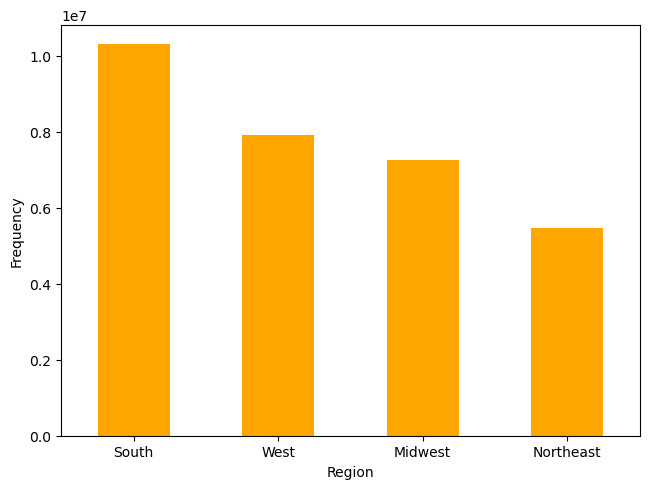

In [41]:
# Region distribution visualization 
region_distribution_bar = instacart_all['region'].value_counts().plot.bar(color='orange')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel('Region')
plt.ylabel('Frequency')

Text(55.847222222222214, 0.5, 'Frequency')

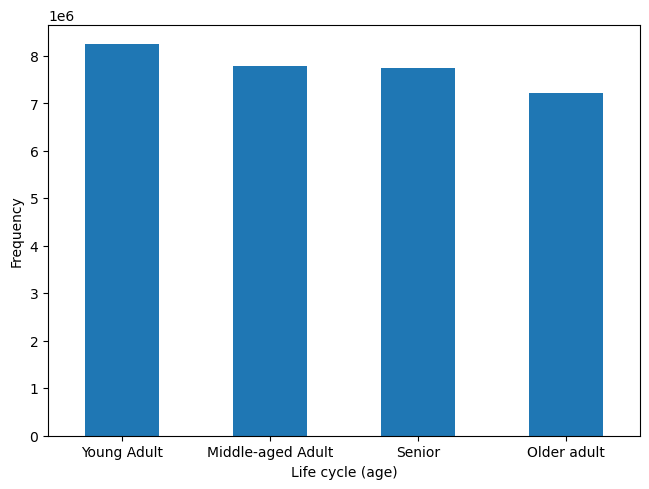

In [42]:
# Age distribution visualization 
age_distribution_bar = instacart_all['life_cycle'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel('Life cycle (age)')
plt.ylabel('Frequency')

Text(33.722222222222214, 0.5, 'Frequency')

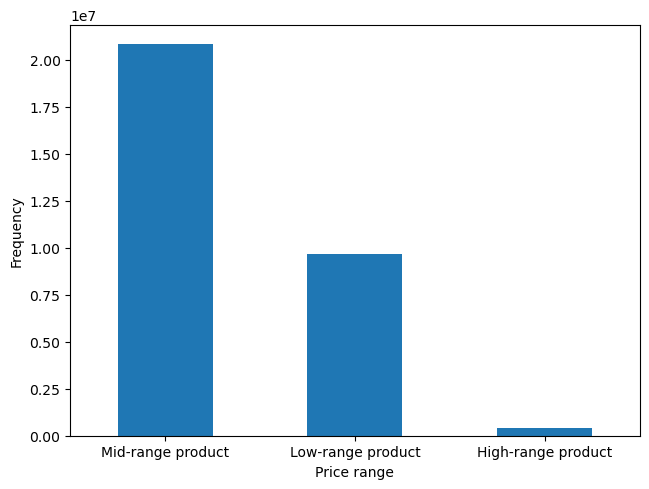

In [43]:
# Price distribution visualization 
price_distribution_bar = instacart_all['price_range_loc'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel('Price range')
plt.ylabel('Frequency')

Text(33.722222222222214, 0.5, 'Frequency')

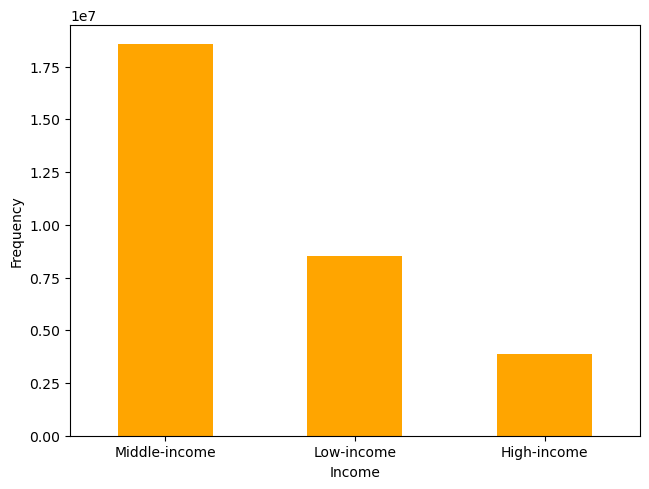

In [44]:
# Income distribution visualization 
income_distribution_bar = instacart_all['income_flag'].value_counts().plot.bar(color='orange')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel('Income')
plt.ylabel('Frequency')

Text(-47.527777777777786, 0.5, 'Department')

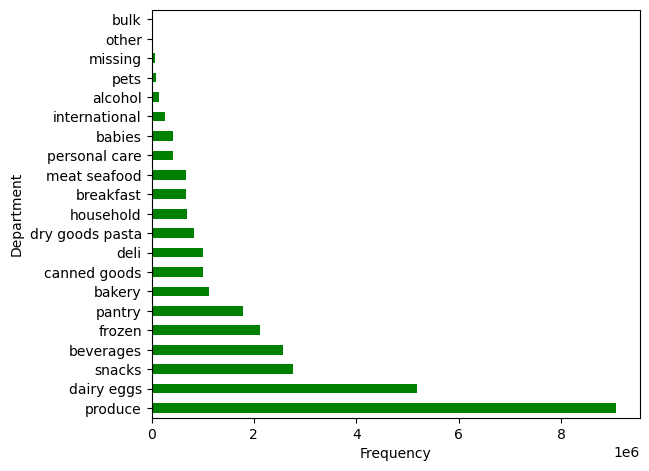

In [45]:
# Product per department distribution
departments_distribution_bar = instacart_all['department'].value_counts().plot.barh(color='green')
plt.tight_layout()
plt.xlabel('Frequency')
plt.ylabel('Department')

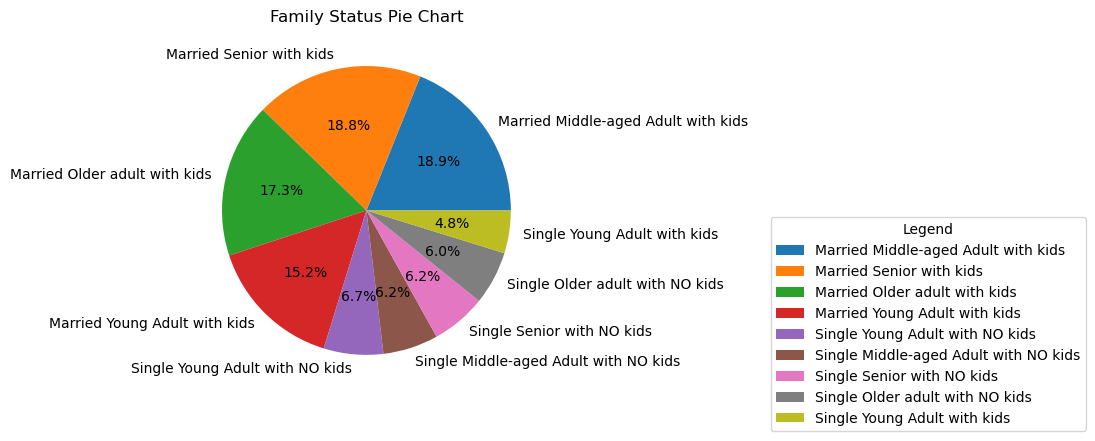

In [46]:
# Create a pie chart for the family status distribution
family_status_pie=instacart_all['family_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.tight_layout()

# Add a title
plt.title('Family Status Pie Chart')
plt.xlabel('')
plt.ylabel('')

# Add a legend
plt.legend(title='Legend', bbox_to_anchor=(1.6, 0.5))

In [47]:
# Export distribution visualizations 
region_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Region distribution bar chart.png'), bbox_inches='tight')
age_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age distribution bar chart.png'), bbox_inches='tight')
income_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income distribution bar chart.png'), bbox_inches='tight')
departments_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department distribution bar chart.png'), bbox_inches='tight')
family_status_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Family Status pie chart with legend.png'), bbox_inches='tight')
price_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price range distribution.png'), bbox_inches='tight')

### 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [48]:
# Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
instacart_all.groupby('family_status').agg({'days_since_last_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_last_order                  \
                                                        max       mean  min   
family_status                                                                 
Married Middle-aged Adult with kids                    30.0  10.770331  0.0   
Married Older adult with kids                          30.0  10.905587  0.0   
Married Senior with kids                               30.0  10.799393  0.0   
Married Young Adult with kids                          30.0  10.814871  0.0   
Single Middle-aged Adult with NO kids                  30.0  10.859981  0.0   
Single Older adult with NO kids                        30.0  10.612965  0.0   
Single Senior with NO kids                             30.0  10.785210  0.0   
Single Young Adult with NO kids                        30.0  10.895306  0.0   
Single Young Adult with kids                           30.0  10.750746  0.0   

                                      prices                 
                                         max      mean  min  
family_status                                                
Married Middle-aged Adult with kids     25.0  7.800066  1.0  
Married Older adult with kids           25.0  7.793678  1.0  
Married Senior with kids                25.0  7.795389  1.0  
Married Young Adult with kids           25.0  7.785475  1.0  
Single Middle-aged Adult with NO kids   25.0  7.795161  1.0  
Single Older adult with NO kids         25.0  7.788473  1.0  
Single Senior with NO kids              25.0  7.806767  1.0  
Single Young Adult with NO kids         25.0  7.785161  1.0  
Single Young Adult with kids            25.0  7.805131  1.0

### 08. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

#### Comparison between age (life cycle) and order frequency 

In [49]:
# Create crosstab between 'life_cycle' and 'frequency_flag'
life_cycle_frequency = pd.crosstab(instacart_all['life_cycle'], instacart_all['frequency_flag'], dropna = False)

In [50]:
life_cycle_frequency.to_clipboard()

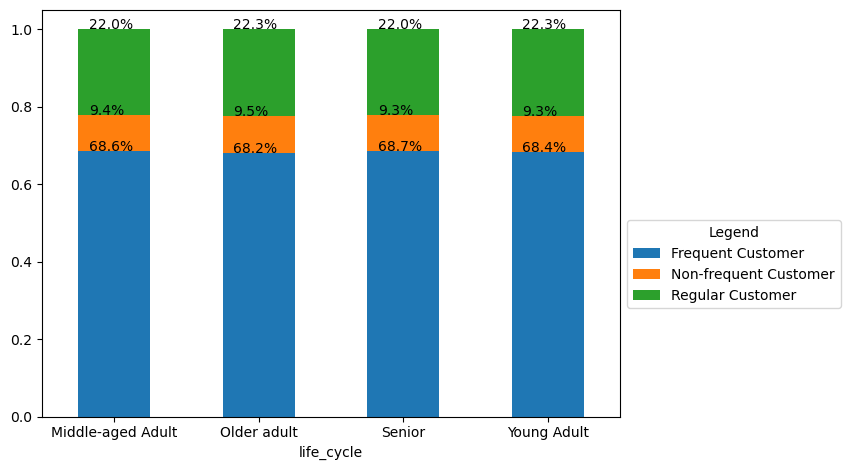

In [51]:
# Create a bar chart from the crosstab
life_cycle_frequency_normalized=life_cycle_frequency.div(life_cycle_frequency.sum(1),axis=0)
life_cycle_frequency_bar=life_cycle_frequency_normalized.plot(kind='bar',stacked= True)

bar_width=0.35
for n, x in enumerate([*life_cycle_frequency.index.values]):
    for (proportion, y_loc) in zip(life_cycle_frequency_normalized.loc[x],life_cycle_frequency_normalized.loc[x].cumsum()):
        x_coord= n - bar_width/2
        plt.text(x=x_coord,
                y=y_loc,
                s=f'{np.round(proportion*100,1):.1f}%')
#Format
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Legend', bbox_to_anchor=(1, 0.5))


#### Comparison between age and price preference

In [52]:
# Create crosstab between 'life_cycle' and 'price_range_loc'
lifecycle_price = pd.crosstab(instacart_all['life_cycle'], instacart_all['price_range_loc'], dropna = False)

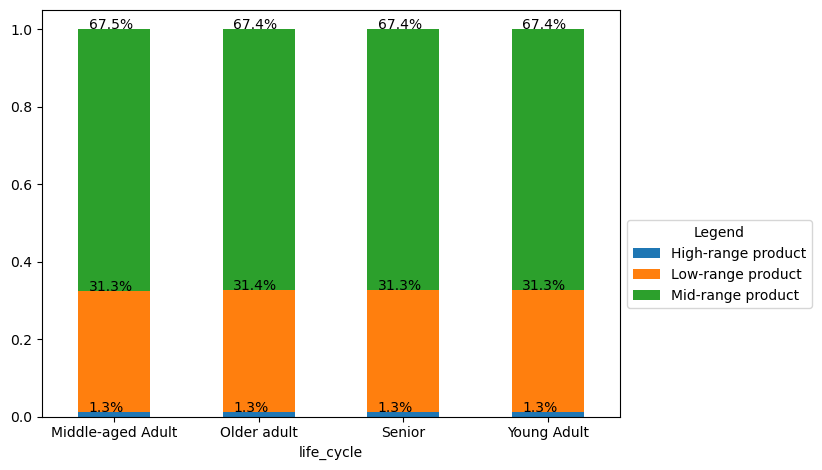

In [53]:
# Create a bar chart from the crosstab
lifecycle_price_normalized=lifecycle_price.div(lifecycle_price.sum(1),axis=0)
lifecycle_price_bar = lifecycle_price_normalized.plot(kind='bar',stacked= True)

bar_width=0.35
for n, x in enumerate([*lifecycle_price.index.values]):
    for (proportion, y_loc) in zip(lifecycle_price_normalized.loc[x],lifecycle_price_normalized.loc[x].cumsum()):
        x_coord= n - bar_width/2
        plt.text(x=x_coord,
                y=y_loc,
                s=f'{np.round(proportion*100,1):.1f}%')
#Format
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Legend', bbox_to_anchor=(1, 0.5))

#### Comparison between income and price preference

In [54]:
# Create crosstab between 'income_flag' and 'price_range_loc'
income_price = pd.crosstab(instacart_all['income_flag'], instacart_all['price_range_loc'], dropna = False)

In [55]:
income_price

price_range_loc,High-range product,Low-range product,Mid-range product
income_flag,,,
High-income,53428,1164927,2666955
Low-income,82046,3002927,5422611
Middle-income,257606,5511228,12736822


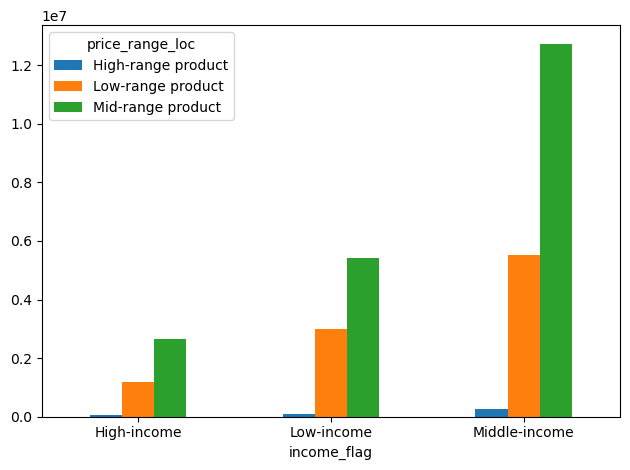

In [56]:
# Create a bar chart from the crosstab
income_price_bar = income_price.plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()

#### Comparison between age and department preference

In [57]:
# Create crosstab between 'life_cycle' and 'department'
life_cycle_department = pd.crosstab(instacart_all['department'], instacart_all['life_cycle'], dropna = False)

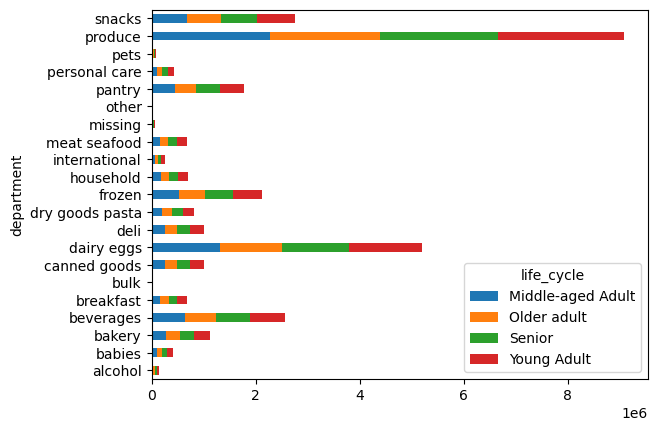

In [58]:
# Create a bar chart from the crosstab
life_cycle_department_bar = life_cycle_department.plot.barh(stacked= True)

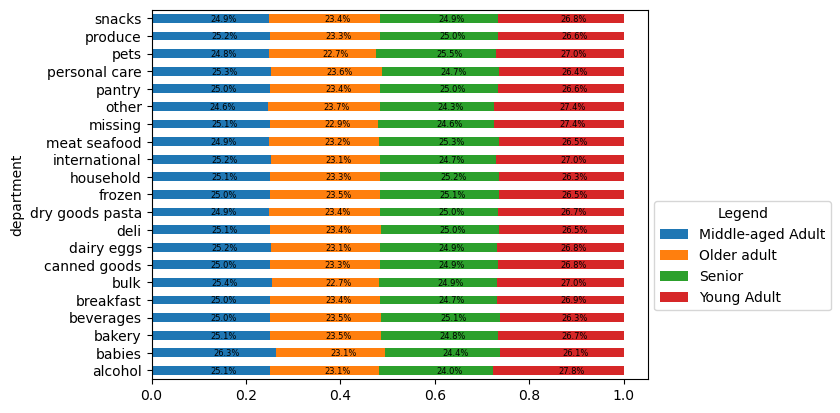

In [59]:
# Create 100% stacked bar chart 
life_cycle_department_normalized=life_cycle_department.div(life_cycle_department.sum(1),axis=0)


life_cycle_department_bar_100 = life_cycle_department_normalized.plot(kind='barh',stacked= True)



bar_width=0.35


for n, x in enumerate([*life_cycle_department.index.values]):
    for (proportion,count,y_loc) in zip(life_cycle_department_normalized.loc[x],life_cycle_department.loc[x],life_cycle_department_normalized.loc[x].cumsum()):
        y_coord=n-bar_width/2
        plt.text(x=(y_loc - proportion) + (proportion/2),
                y=y_coord,
                s=f'{np.round(proportion*100,1)}%',
                fontsize=6)
        

#Format

plt.legend(title='Legend', bbox_to_anchor=(1, 0.5))


There is no significant difference between the age groups when it comes to department preference

#### Comparison between region and department preference

In [60]:
# Create crosstab between 'region' and 'department'
regionvdepartment = pd.crosstab(instacart_all['department'], instacart_all['region'], dropna = False)

In [61]:
# Print crosstab results
regionvdepartment

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,262614,200136,373055,289221
beverages,598990,462931,859435,650578
breakfast,157553,119157,225177,175186
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1215821,917293,1727823,1330891
deli,234464,178398,333620,257352


In [62]:
regionvdepartment.to_clipboard()

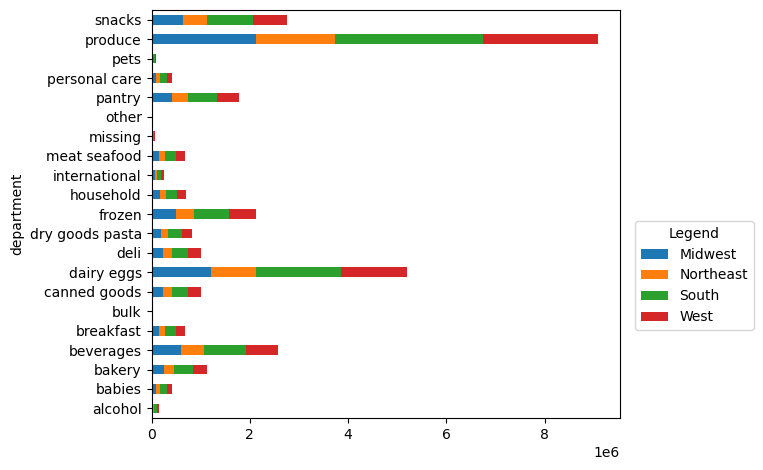

In [63]:
# Create a bar chart from the crosstab
regionvdepartment_bar = regionvdepartment.plot.barh(stacked= True)
plt.tight_layout()
plt.xticks(rotation=0) 
# Add a legend
plt.legend(title='Legend', bbox_to_anchor=(1.3, 0.5))

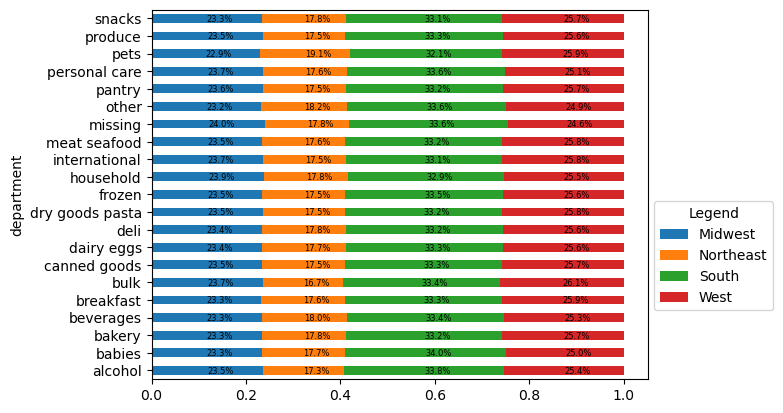

In [64]:
# Create 100% stacked bar chart 
regionvdepartment_normalized=regionvdepartment.div(life_cycle_department.sum(1),axis=0)


regionvdepartment_bar100 = regionvdepartment_normalized.plot(kind='barh',stacked= True)



bar_width=0.35


for n, x in enumerate([*regionvdepartment.index.values]):
    for (proportion,count,y_loc) in zip(regionvdepartment_normalized.loc[x],regionvdepartment.loc[x],regionvdepartment_normalized.loc[x].cumsum()):
        y_coord=n-bar_width/2
        plt.text(x=(y_loc - proportion) + (proportion/2),
                y=y_coord,
                s=f'{np.round(proportion*100,1)}%',
                fontsize=6)
        

#Format

plt.legend(title='Legend', bbox_to_anchor=(1, 0.5))


#### Comparison between age and income

In [65]:
# Create crosstab between 'income_flag' and 'life_cycle'
life_cycle_income = pd.crosstab(instacart_all['income_flag'], instacart_all['life_cycle'], dropna = False)

In [66]:
life_cycle_income

life_cycle,Middle-aged Adult,Older adult,Senior,Young Adult
income_flag,,,,
High-income,982416,1385513,1454090,75765
Low-income,2163197,1023173,1062849,4279257
Middle-income,4635612,4814757,5220440,3894473


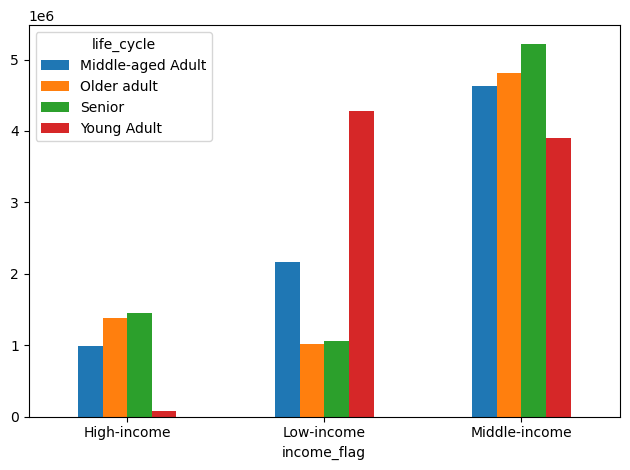

In [67]:
# Create a bar chart from the crosstab
life_cycle_income_bar = life_cycle_income.plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()

Seniors lead the high income and middle income groups, while young adults lead the low-income category and represent an insignificant proportion of the high-income group.

#### Comparison between income and department preference

In [68]:
# Create crosstab between 'income_flag' and 'department'
income_department = pd.crosstab(instacart_all['department'], instacart_all['income_flag'], dropna = False)

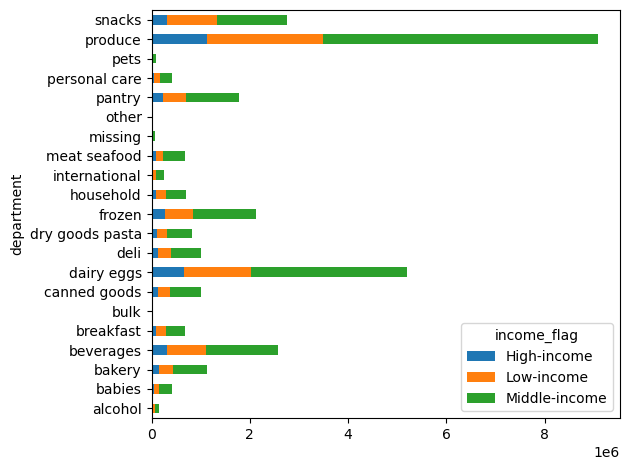

In [69]:
# Create a bar chart from the crosstab
income_department_bar = income_department.plot.barh(stacked= True)
plt.tight_layout()

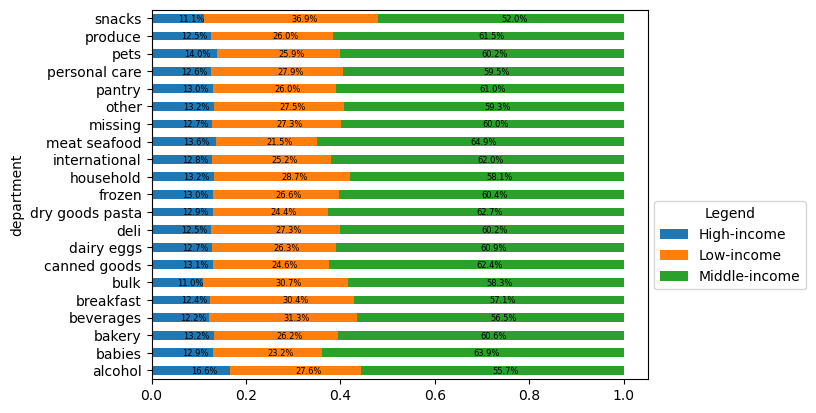

In [70]:
# Create 100% stacked bar chart 
income_department_normalized=income_department.div(income_department.sum(1),axis=0)


income_department_bar100 = income_department_normalized.plot(kind='barh',stacked= True)



bar_width=0.35


for n, x in enumerate([*income_department.index.values]):
    for (proportion,count,y_loc) in zip(income_department_normalized.loc[x],income_department.loc[x],income_department_normalized.loc[x].cumsum()):
        y_coord=n-bar_width/2
        plt.text(x=(y_loc - proportion) + (proportion/2),
                y=y_coord,
                s=f'{np.round(proportion*100,1)}%',
                fontsize=6)
        

#Format

plt.legend(title='Legend', bbox_to_anchor=(1, 0.5))


#### Comparison between family status and income

In [71]:
# Create crosstab between 'marital_status' and 'income_flag'
maritalstatus_income = pd.crosstab(instacart_all['family_status'], instacart_all['income_flag'], dropna = False)

In [72]:
maritalstatus_income 

income_flag,High-income,Low-income,Middle-income
family_status,,,
Married Middle-aged Adult with kids,731592,1622143,3509945
Married Older adult with kids,1025677,761942,3579655
Married Senior with kids,1086407,811868,3931544
Married Young Adult with kids,41787,2456695,2203015
Single Middle-aged Adult with NO kids,250824,541054,1125667
Single Older adult with NO kids,359836,261231,1235102
Single Senior with NO kids,367683,250981,1288896
Single Young Adult with NO kids,19007,1080532,965884
Single Young Adult with kids,14971,742030,725574


In [73]:
maritalstatus_income.to_clipboard()

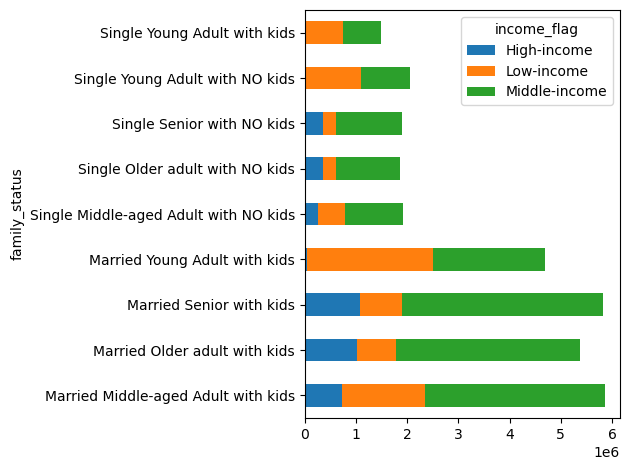

In [74]:
# Create a bar chart from the crosstab
maritalstatus_income_bar = maritalstatus_income.plot.barh(stacked= True)
plt.tight_layout()


#### Comparison between family status and day of order frequency

In [75]:
# Create crosstab between 'marital_status' and 'orders_day_of_week'
familystatus_odw = pd.crosstab(instacart_all['orders_day_of_week'], instacart_all['family_status'], dropna = False)

In [76]:
familystatus_odw 

family_status,Married Middle-aged Adult with kids,Married Older adult with kids,Married Senior with kids,Married Young Adult with kids,Single Middle-aged Adult with NO kids,Single Older adult with NO kids,Single Senior with NO kids,Single Young Adult with NO kids,Single Young Adult with kids
orders_day_of_week,,,,,,,,,
0,1119719,1016865,1113504,904068,366807,355151,364787,391634,281073
1,1019113,942302,1009046,822984,334588,324668,328596,375800,259729
2,764764,702071,758172,607240,249057,241408,247296,265736,192566
3,694570,638406,692620,554719,227381,218315,229265,242894,174600
4,688274,628437,680454,551457,224861,216389,220161,244692,173388
5,758325,693152,760040,614895,253658,247702,249400,264355,195627
6,818915,746041,815983,646134,261193,252536,268055,280312,205592


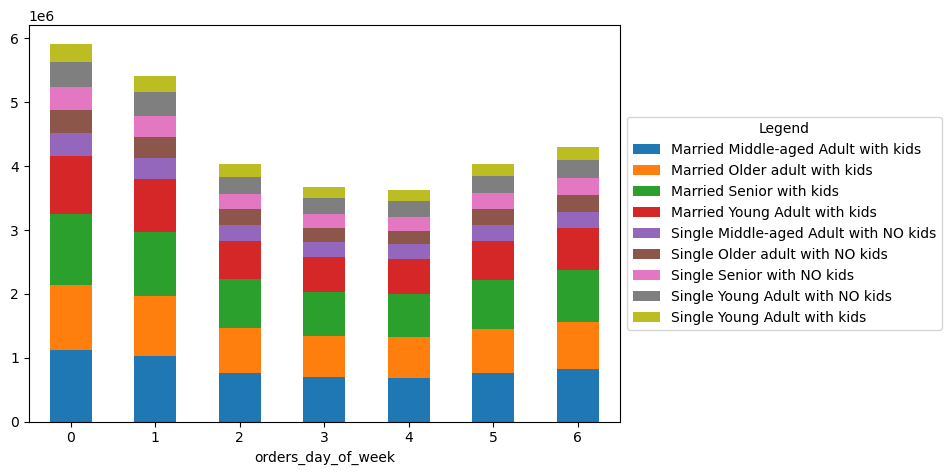

In [77]:
# Create a bar chart from the crosstab
familystatus_odw_bar = familystatus_odw.plot.bar(stacked= True)
plt.tight_layout()
plt.xticks(rotation=0) 
# Add a legend
plt.legend(title='Legend', loc='center left', bbox_to_anchor=(1, 0.5))

#### Comparison between family status and prefered hour of the day for ordering

In [78]:
# Create crosstab between 'marital_status' and 'orders_hour_of_day'
familystatus_hod = pd.crosstab(instacart_all['order_hour_of_day'], instacart_all['family_status'], dropna = False)

In [79]:
familystatus_hod

family_status,Married Middle-aged Adult with kids,Married Older adult with kids,Married Senior with kids,Married Young Adult with kids,Single Middle-aged Adult with NO kids,Single Older adult with NO kids,Single Senior with NO kids,Single Young Adult with NO kids,Single Young Adult with kids
order_hour_of_day,,,,,,,,,
0,39401,35727,38407,32516,14075,11878,11733,13788,10666
1,21589,18451,20693,16655,6867,6196,6148,7539,5561
2,12680,10496,11861,10466,3861,3766,4703,4416,3489
3,9229,7893,9237,7551,2577,3104,3372,3331,2537
4,8721,9417,10064,7590,2947,2908,2870,3486,2796
5,15374,14879,16125,12478,5105,4871,5711,5622,4340
6,51978,48559,52762,42167,16526,16658,17620,20126,14879
7,156908,151216,164156,129161,51654,53714,56198,58746,42279
8,314172,285859,314843,253646,105010,100728,101835,108808,75909


In [80]:
familystatus_hod.to_clipboard()

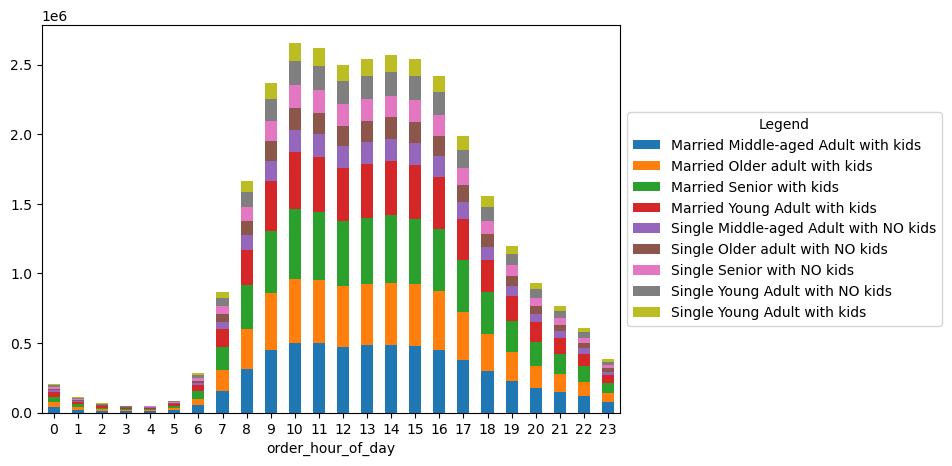

In [81]:
# Create a bar chart from the crosstab
familystatus_hod_bar =familystatus_hod.plot.bar(stacked=True)
plt.tight_layout()
plt.xticks(rotation=0) 
plt.legend(title='Legend', loc='center left', bbox_to_anchor=(1, 0.5))

#### Comparison between family status and loyalty 

In [82]:
# Create crosstab between 'loyalty_flag' and 'family_status'
family_loyalty = pd.crosstab(instacart_all['family_status'], instacart_all['loyalty_flag'], dropna = False)

In [83]:
family_loyalty

loyalty_flag,Loyal Customer,New Customer,Regular Customer
family_status,,,
Married Middle-aged Adult with kids,1963011,890473,3010196
Married Older adult with kids,1747985,858794,2760495
Married Senior with kids,1945700,905382,2978737
Married Young Adult with kids,1551985,728761,2420751
Single Middle-aged Adult with NO kids,634257,295491,987797
Single Older adult with NO kids,650197,276241,929731
Single Senior with NO kids,634169,298613,974778
Single Young Adult with NO kids,672879,331933,1060611
Single Young Adult with kids,493251,221962,767362


In [84]:
family_loyalty.to_clipboard()

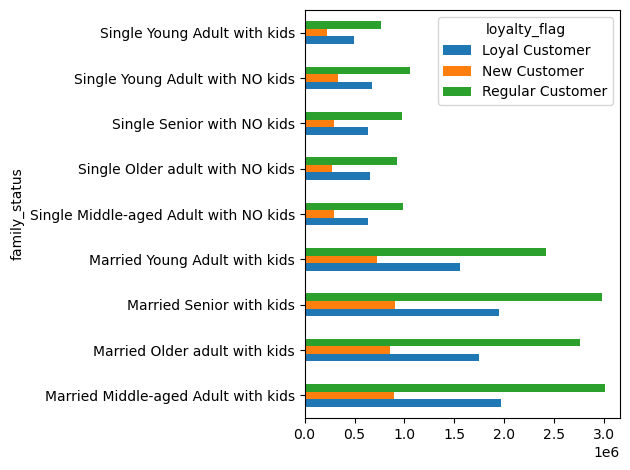

In [85]:
# Create a bar chart from the crosstab
family_loyalty_bar =family_loyalty.plot.barh()
plt.tight_layout()

#### Comparison between age and product preference

In [86]:
# Calculate the top most sold products
top_products = instacart_all.loc[instacart_all['department'] == 'produce'].groupby('product_name')['prices'].sum().nlargest(30).index.tolist()

#Filter the sales data to include only the top products
top_product_data=instacart_all[instacart_all['product_name'].isin(top_products)]

# Create crosstab between most sold products ('product_name') and 'life_cycle'
product_age = pd.crosstab(top_product_data['product_name'], top_product_data['life_cycle'], dropna = False)

In [87]:
product_age

life_cycle,Middle-aged Adult,Older adult,Senior,Young Adult
product_name,,,,
Apple Honeycrisp Organic,21420,18537,20704,21688
Asparagus,16071,15178,16115,16784
Bag of Organic Bananas,91481,86043,92156,96723
Banana,114661,105092,112556,120855
Bunched Cilantro,11198,10032,10720,11182
Carrots,17666,15945,17624,18624
Cucumber Kirby,23559,21405,22985,24663
Fresh Cauliflower,17377,16134,17024,18347
Hass Avocados,11965,11228,12348,12430


In [88]:
product_age.to_clipboard()

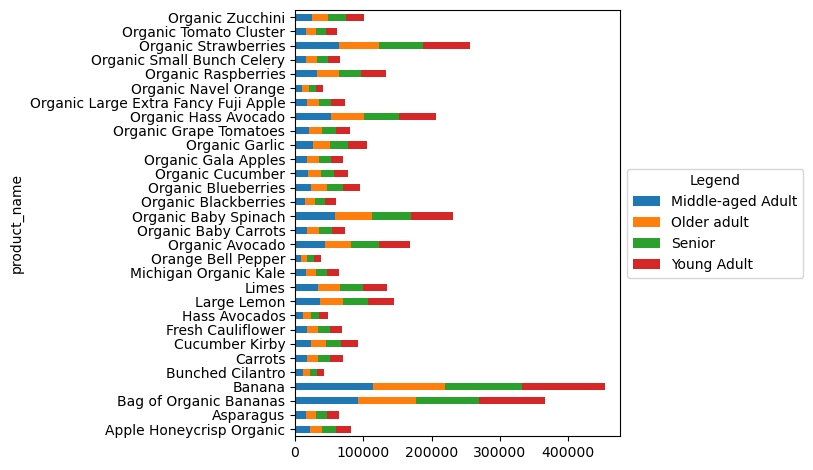

In [89]:
# Create a bar chart from the crosstab
product_age_bar =product_age.plot.barh(stacked=True)
plt.tight_layout()

# Add a legend
plt.legend(title='Legend', loc='center left', bbox_to_anchor=(1, 0.5))

In [90]:
# Calculate the top least sold products
bottom_products = instacart_all.loc[instacart_all['department'].isin(['bulk', 'other', 'missing', 'pets', 'alcohol'])].groupby('product_name')['prices'].sum().nsmallest(50).index.tolist()

#Filter the sales data to include only the bottom products
bottom_product_data=instacart_all[instacart_all['product_name'].isin(bottom_products)]

# Create crosstab between least sold products ('product_name') and 'life_cycle'
product_age_bottom = pd.crosstab(bottom_product_data['product_name'],bottom_product_data['life_cycle'], dropna = False)

In [91]:
product_age_bottom

life_cycle,Middle-aged Adult,Older adult,Senior,Young Adult
product_name,,,,
'Swingtop' Premium Lager,0,0,1,0
18 Year Scotch Whisky,0,2,0,0
Aged Rum,1,0,0,0
"Anti-Fungal Liquid, Maximum Strength",1,0,0,1
Black Cherry Ginger Ale,0,3,2,0
Boneless Beef Top Round Steak,1,0,0,0
Butter Rum Individually Wrapped Hard Candy,0,0,2,0
Butter Snaps Bonus Bag,1,0,0,0
Cabernet Sauvignon California 2008,1,1,1,0


In [92]:
product_age_bottom.to_clipboard()

#### Comparison between Family Status and Number of orders during the week

In [93]:
# Create sample of the data
# Create a list holding True/False values to the test
dev = np.random.rand(len(instacart_all)) <= 0.7

In [94]:
# Store 70% of the sample in the dataframe instacart_big
instacart_big = instacart_all[dev]

In [95]:
# Store 30% of the sample in the dataframe instacart_small
instacart_small = instacart_all[~dev]

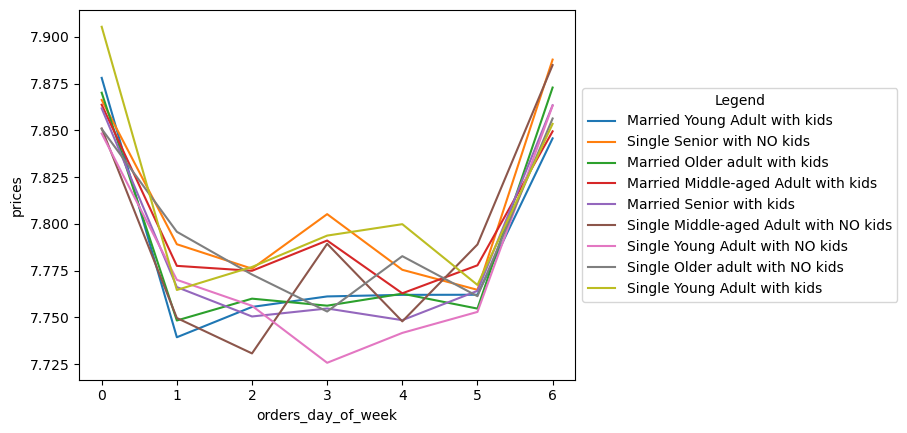

In [96]:
otd_price_family = sns.lineplot(x='orders_day_of_week', y='prices', hue='family_status', data=instacart_small, errorbar=None)

# Add a legend
plt.legend(title='Legend', loc='center left', bbox_to_anchor=(1, 0.5))

### 09. Produce suitable charts to illustrate your results and export them in your project folder.

In [98]:
spendingvregion_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Region spending bar chart.png'), bbox_inches='tight')
life_cycle_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'lofe cycle frequency bar chart.png'), bbox_inches='tight')
lifecycle_price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Life cycle price  chart.png'), bbox_inches='tight')
income_price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income v price chart.png'), bbox_inches='tight')
life_cycle_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Life cycle v department chart.png'), bbox_inches='tight')
life_cycle_department_bar_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Life cycle v department chart100.png'), bbox_inches='tight')
life_cycle_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Life cycle v income chart.png'), bbox_inches='tight')
income_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income v department chart.png'), bbox_inches='tight')
familystatus_hod_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family status v hod chart.png'), bbox_inches='tight')
family_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family v loyalty chart.png'), bbox_inches='tight')
product_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top products v age chart.png'), bbox_inches='tight')
otd_price_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'otd price family status line chart.png'), bbox_inches='tight')
regionvdepartment_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region v department chart.png'), bbox_inches='tight')
regionvdepartment_bar100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region v department chart100.png'), bbox_inches='tight')
income_department_bar100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income v department chart100.png'), bbox_inches='tight')